### Data Wrangling with Pandas

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set some pandas options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 25)

#### Date/Time Data Handling

In [4]:
from datetime import datetime

In [5]:
now = datetime.now()
now

datetime.datetime(2017, 10, 17, 21, 58, 13, 753032)

In [6]:
now.day

17

In [7]:
now.weekday()

1

In [8]:
from datetime import date, time

In [9]:
time(3, 24)

datetime.time(3, 24)

In [10]:
date(1970, 9, 3)

datetime.date(1970, 9, 3)

In [11]:
my_age = now-datetime(1979,9,3)
my_age

datetime.timedelta(13924, 79093, 753032)

In [12]:
my_age.days/365

38.14794520547945

In [13]:
segments = pd.read_csv('data/AIS/transit_segments.csv')
segments.head()

   mmsi               name  transit  segment  seg_length  avg_sog  min_sog  \
0     1        Us Govt Ves        1        1         5.1     13.2      9.2   
1     1  Dredge Capt Frank        1        1        13.5     18.6     10.4   
2     1      Us Gov Vessel        1        1         4.3     16.2     10.3   
3     1      Us Gov Vessel        2        1         9.2     15.4     14.5   
4     1  Dredge Capt Frank        2        1         9.2     15.4     14.6   

   max_sog  pdgt10        st_time       end_time  
0     14.5    96.5  2/10/09 16:03  2/10/09 16:27  
1     20.6   100.0   4/6/09 14:31   4/6/09 15:20  
2     20.5   100.0   4/6/09 14:36   4/6/09 14:55  
3     16.1   100.0  4/10/09 17:58  4/10/09 18:34  
4     16.2   100.0  4/10/09 17:59  4/10/09 18:35  

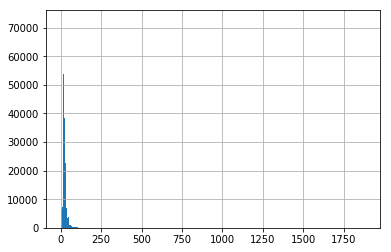

In [14]:
segments.seg_length.hist(bins=500)

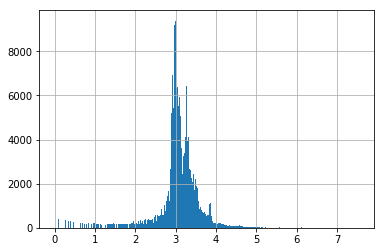

In [15]:
segments.seg_length.apply(np.log).hist(bins=500)

In [16]:
segments.st_time.dtype

dtype('O')

In [17]:
datetime.strptime(segments.st_time.loc[0], '%m/%d/%y %H:%M')

datetime.datetime(2009, 2, 10, 16, 3)

In [18]:
from dateutil.parser import parse

In [19]:
parse(segments.st_time.loc[0])

datetime.datetime(2009, 2, 10, 16, 3)

In [20]:
segments.st_time

0         2/10/09 16:03
1          4/6/09 14:31
2          4/6/09 14:36
3         4/10/09 17:58
4         4/10/09 17:59
5         3/20/10 16:06
6         3/20/10 18:05
7          5/4/11 11:28
8          6/5/10 11:23
9          6/8/10 11:03
10        6/14/10 17:07
11        6/17/10 16:35
              ...      
262514    5/19/10 19:46
262515    5/31/10 14:27
262516      6/5/10 5:25
262517     6/27/10 2:35
262518      7/1/10 3:49
262519      7/2/10 3:30
262520    6/13/10 10:32
262521    6/15/10 12:49
262522    6/15/10 21:32
262523    6/17/10 19:16
262524     6/18/10 2:52
262525    6/18/10 10:19
Name: st_time, Length: 262526, dtype: object

In [21]:
segments.st_time.apply(lambda d: datetime.strptime(d, '%m/%d/%y %H:%M'))

0        2009-02-10 16:03:00
1        2009-04-06 14:31:00
2        2009-04-06 14:36:00
3        2009-04-10 17:58:00
4        2009-04-10 17:59:00
5        2010-03-20 16:06:00
6        2010-03-20 18:05:00
7        2011-05-04 11:28:00
8        2010-06-05 11:23:00
9        2010-06-08 11:03:00
10       2010-06-14 17:07:00
11       2010-06-17 16:35:00
                 ...        
262514   2010-05-19 19:46:00
262515   2010-05-31 14:27:00
262516   2010-06-05 05:25:00
262517   2010-06-27 02:35:00
262518   2010-07-01 03:49:00
262519   2010-07-02 03:30:00
262520   2010-06-13 10:32:00
262521   2010-06-15 12:49:00
262522   2010-06-15 21:32:00
262523   2010-06-17 19:16:00
262524   2010-06-18 02:52:00
262525   2010-06-18 10:19:00
Name: st_time, Length: 262526, dtype: datetime64[ns]

In [22]:
pd.to_datetime(segments.st_time)

0        2009-02-10 16:03:00
1        2009-04-06 14:31:00
2        2009-04-06 14:36:00
3        2009-04-10 17:58:00
4        2009-04-10 17:59:00
5        2010-03-20 16:06:00
6        2010-03-20 18:05:00
7        2011-05-04 11:28:00
8        2010-06-05 11:23:00
9        2010-06-08 11:03:00
10       2010-06-14 17:07:00
11       2010-06-17 16:35:00
                 ...        
262514   2010-05-19 19:46:00
262515   2010-05-31 14:27:00
262516   2010-06-05 05:25:00
262517   2010-06-27 02:35:00
262518   2010-07-01 03:49:00
262519   2010-07-02 03:30:00
262520   2010-06-13 10:32:00
262521   2010-06-15 12:49:00
262522   2010-06-15 21:32:00
262523   2010-06-17 19:16:00
262524   2010-06-18 02:52:00
262525   2010-06-18 10:19:00
Name: st_time, Length: 262526, dtype: datetime64[ns]

Pandas also has a custom NA value for missing datetime objects, NaT.

In [23]:
pd.to_datetime(None)

#### Merging and joining DataFrame objects

In [24]:

vessels = pd.read_csv("data/AIS/vessel_information.csv", index_col='mmsi')
vessels.head()

      num_names                                              names sov  \
mmsi                                                                     
1             8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y   
9             3                         000000009/Raven/Shearwater   N   
21            1                                      Us Gov Vessel   Y   
74            2                                  Mcfaul/Sarah Bell   N   
103           3           Ron G/Us Navy Warship 103/Us Warship 103   Y   

         flag flag_type  num_loas                                    loa  \
mmsi                                                                       
1     Unknown   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0   
9     Unknown   Unknown         2                              50.0/62.0   
21    Unknown   Unknown         1                                  208.0   
74    Unknown   Unknown         1                                  155.0   
103   Unknown   Unknown  

In [25]:
[v for v in vessels.type.unique() if v.find('/')==-1]

['Unknown',
 'Other',
 'Tug',
 'Towing',
 'Pleasure',
 'Cargo',
 'WIG',
 'Fishing',
 'BigTow',
 'MilOps',
 'Tanker',
 'Passenger',
 'SAR',
 'Sailing',
 'Reserved',
 'Law',
 'Dredging',
 'AntiPol',
 'Pilot',
 'HSC',
 'Diving',
 'Resol-18',
 'Tender',
 'Spare',
 'Medical']

In [26]:
vessels.type.value_counts()

Cargo                             5622
Tanker                            2440
Pleasure                           601
Tug                                221
Sailing                            205
Fishing                            200
Other                              178
Passenger                          150
Towing                             117
Unknown                            106
MilOps                              82
Cargo/Unknown                       79
                                  ... 
BigTow/Cargo/Unknown                 1
BigTow/MilOps/Towing                 1
BigTow/Reserved/Towing/Tug/WIG       1
Fishing/Pilot/Unknown                1
BigTow/Other/Towing                  1
BigTow/Resol-18/Towing               1
AntiPol/Fishing/Pleasure             1
AntiPol/Other                        1
Other/Reserved/Tug                   1
Resol-18/Tanker                      1
Cargo/Dredging                       1
BigTow/Tug/Unknown                   1
Name: type, Length: 206, 

In [27]:
df1 = pd.DataFrame(dict(id=list(range(4)), age=np.random.randint(18, 31, size=4)))
df2 = pd.DataFrame(dict(id=list(range(3))+list(range(3)), score=np.random.random(size=6)))

df1, df2

(   age  id
 0   30   0
 1   24   1
 2   27   2
 3   18   3,    id     score
 0   0  0.290494
 1   1  0.376077
 2   2  0.501492
 3   0  0.977761
 4   1  0.133118
 5   2  0.814510)

In [28]:
df1

   age  id
0   30   0
1   24   1
2   27   2
3   18   3

In [29]:
df2

   id     score
0   0  0.290494
1   1  0.376077
2   2  0.501492
3   0  0.977761
4   1  0.133118
5   2  0.814510

In [30]:
pd.merge(df1, df2)

   age  id     score
0   30   0  0.290494
1   30   0  0.977761
2   24   1  0.376077
3   24   1  0.133118
4   27   2  0.501492
5   27   2  0.814510

In [31]:
pd.merge(df1, df2, how='outer')

   age  id     score
0   30   0  0.290494
1   30   0  0.977761
2   24   1  0.376077
3   24   1  0.133118
4   27   2  0.501492
5   27   2  0.814510
6   18   3       NaN

In [32]:
segments.head(1)

   mmsi         name  transit  segment  seg_length  avg_sog  min_sog  max_sog  \
0     1  Us Govt Ves        1        1         5.1     13.2      9.2     14.5   

   pdgt10        st_time       end_time  
0    96.5  2/10/09 16:03  2/10/09 16:27  

In [33]:
vessels.head(1)

      num_names                                              names sov  \
mmsi                                                                     
1             8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y   

         flag flag_type  num_loas                                    loa  \
mmsi                                                                       
1     Unknown   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0   

      max_loa  num_types                             type  
mmsi                                                       
1       156.0          4  Dredging/MilOps/Reserved/Towing  


we see that there is a mmsi value (a vessel identifier) in each table, but it is used as an index for the vessels table. In this case, we have to specify to join on the index for this table, and on the mmsi column for the other.

In [34]:
segments_merged = pd.merge(vessels, segments, left_index=True,
                          right_on='mmsi')

In [35]:
segments_merged.head()

   num_names                                              names sov     flag  \
0          8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y  Unknown   
1          8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y  Unknown   
2          8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y  Unknown   
3          8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y  Unknown   
4          8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y  Unknown   

  flag_type  num_loas                                    loa  max_loa  \
0   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0    156.0   
1   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0    156.0   
2   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0    156.0   
3   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0    156.0   
4   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0    156.0   

   num_types                             type      ...        \
0          4  Dr

In [36]:
segments['type'] = 'foo'
pd.merge(vessels, segments, left_index=True, right_on='mmsi').head()

   num_names                                              names sov     flag  \
0          8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y  Unknown   
1          8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y  Unknown   
2          8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y  Unknown   
3          8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y  Unknown   
4          8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y  Unknown   

  flag_type  num_loas                                    loa  max_loa  \
0   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0    156.0   
1   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0    156.0   
2   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0    156.0   
3   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0    156.0   
4   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0    156.0   

   num_types                           type_x  ...    transit segment  \
0      

#### Concatenation

In [37]:
np.random.random(5)

array([ 0.9207705 ,  0.1313545 ,  0.23872944,  0.20953802,  0.19561541])

In [38]:
np.concatenate([np.random.random(5), np.random.random(5)])

array([ 0.25134248,  0.80050387,  0.66847351,  0.44439112,  0.78672227,
        0.68184414,  0.0792011 ,  0.42014257,  0.915922  ,  0.18179836])

In [39]:
np.r_[np.random.random(5), np.random.random(5)]

array([ 0.09837934,  0.85163779,  0.50799198,  0.0830323 ,  0.36910168,
        0.34396807,  0.37660104,  0.65995776,  0.89885902,  0.05724089])

In [40]:
np.c_[np.random.random(5), np.random.random(5)]

array([[ 0.55355602,  0.18182936],
       [ 0.48031781,  0.34291042],
       [ 0.53277984,  0.25032473],
       [ 0.05303842,  0.35276976],
       [ 0.12594153,  0.34484079]])

This operation is also called binding or stacking.
With Pandas' indexed data structures, there are additional considerations as the overlap in index values between two data structures affects how they are concatenate.

In [41]:
mb1 = pd.read_excel('data/microbiome/MID1.xls', 'Sheet 1', index_col=0, header=None)
mb2 = pd.read_excel('data/microbiome/MID2.xls', 'Sheet 1', index_col=0, header=None)
mb1.shape, mb2.shape

((272, 1), (288, 1))

In [42]:
mb1.head()

                                                    1
0                                                    
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...  7
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...  2
Archaea "Crenarchaeota" Thermoprotei Sulfolobal...  3
Archaea "Crenarchaeota" Thermoprotei Thermoprot...  3
Archaea "Euryarchaeota" "Methanomicrobia" Metha...  7

In [43]:
mb1.columns = mb2.columns = ['Count']

In [44]:
mb1.index.name = mb2.index.name = 'Taxon'

In [45]:
mb1.head()

                                                    Count
Taxon                                                    
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...      7
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...      2
Archaea "Crenarchaeota" Thermoprotei Sulfolobal...      3
Archaea "Crenarchaeota" Thermoprotei Thermoprot...      3
Archaea "Euryarchaeota" "Methanomicrobia" Metha...      7

In [46]:
mb1.index[:3]

Index(['Archaea "Crenarchaeota" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera',
       'Archaea "Crenarchaeota" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrolobus',
       'Archaea "Crenarchaeota" Thermoprotei Sulfolobales Sulfolobaceae Stygiolobus'],
      dtype='object', name='Taxon')

In [47]:
mb1.index.is_unique

True

In [48]:
pd.concat([mb1, mb2], axis=0).shape

(560, 1)

In [49]:
pd.concat([mb1, mb2], axis=0).index.is_unique

False

In [50]:
pd.concat([mb1, mb2], axis=1).shape

(438, 2)

In [51]:
pd.concat([mb1,mb2], axis=1).head()

                                                    Count  Count
Archaea "Crenarchaeota" Thermoprotei Acidilobal...    NaN    2.0
Archaea "Crenarchaeota" Thermoprotei Acidilobal...    NaN   14.0
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...    7.0   23.0
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...    NaN    1.0
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...    NaN    2.0

In [53]:
pd.concat([mb1, mb2], axis=1).values[:5]

array([[ nan,   2.],
       [ nan,  14.],
       [  7.,  23.],
       [ nan,   1.],
       [ nan,   2.]])

In [54]:
pd.concat([mb1, mb2], axis=1, join='inner').head()

                                                    Count  Count
Taxon                                                           
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...      7     23
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...      2      2
Archaea "Crenarchaeota" Thermoprotei Sulfolobal...      3     10
Archaea "Crenarchaeota" Thermoprotei Thermoprot...      3      9
Archaea "Euryarchaeota" "Methanomicrobia" Metha...      7      9

In [57]:
mb1.combine_first(mb2).head()

                                                    Count
Taxon                                                    
Archaea "Crenarchaeota" Thermoprotei Acidilobal...    2.0
Archaea "Crenarchaeota" Thermoprotei Acidilobal...   14.0
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...    7.0
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...    1.0
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...    2.0

In [58]:
pd.concat([mb1,mb2],keys=['patient1','patient2']).head()

                                                             Count
         Taxon                                                    
patient1 Archaea "Crenarchaeota" Thermoprotei Desulfuroc...      7
         Archaea "Crenarchaeota" Thermoprotei Desulfuroc...      2
         Archaea "Crenarchaeota" Thermoprotei Sulfolobal...      3
         Archaea "Crenarchaeota" Thermoprotei Thermoprot...      3
         Archaea "Euryarchaeota" "Methanomicrobia" Metha...      7

In [62]:
pd.concat([mb1, mb2], keys=['patient1', 'patient2']).index.is_unique

True

In [63]:
pd.concat(dict(patient1=mb1, patient2=mb2), axis=1).head()

                                                   patient1 patient2
                                                      Count    Count
Archaea "Crenarchaeota" Thermoprotei Acidilobal...      NaN      2.0
Archaea "Crenarchaeota" Thermoprotei Acidilobal...      NaN     14.0
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...      7.0     23.0
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...      NaN      1.0
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...      NaN      2.0

#### Reshaping DataFrame Objects

In [65]:
cdystonia = pd.read_csv('data/cdystonia.csv', index_col=None)
cdystonia.head()

   patient  obs  week  site  id  treat  age sex  twstrs
0        1    1     0     1   1  5000U   65   F      32
1        1    2     2     1   1  5000U   65   F      30
2        1    3     4     1   1  5000U   65   F      24
3        1    4     8     1   1  5000U   65   F      37
4        1    5    12     1   1  5000U   65   F      39


The stack method rotates the data frame so that columns are represented in rows:


In [67]:
stacked = cdystonia.stack()
stacked

0    patient        1
     obs            1
     week           0
     site           1
     id             1
     treat      5000U
     age           65
     sex            F
     twstrs        32
1    patient        1
     obs            2
     week           2
                ...  
629  age           57
     sex            M
     twstrs        36
630  patient      109
     obs            6
     week          16
     site           9
     id            11
     treat      5000U
     age           57
     sex            M
     twstrs        51
Length: 5679, dtype: object

In [68]:
stacked.unstack().head()

  patient obs week site id  treat age sex twstrs
0       1   1    0    1  1  5000U  65   F     32
1       1   2    2    1  1  5000U  65   F     30
2       1   3    4    1  1  5000U  65   F     24
3       1   4    8    1  1  5000U  65   F     37
4       1   5   12    1  1  5000U  65   F     39

In [70]:
cdystonia2 = cdystonia.set_index(['patient','obs'])
cdystonia2.head()

             week  site  id  treat  age sex  twstrs
patient obs                                        
1       1       0     1   1  5000U   65   F      32
        2       2     1   1  5000U   65   F      30
        3       4     1   1  5000U   65   F      24
        4       8     1   1  5000U   65   F      37
        5      12     1   1  5000U   65   F      39

In [71]:
cdystonia2.index.is_unique

True